# Step 0: Testing the R-Environment

In [1]:
y = 1+1 ### Das Ergebnis einfacher Mathe als "y" speichern
y       ### Man fragt das System an, was jetzt y ist?
exp = 3 ### Ein Objekt "exp" ist eine Zahl und gleicht 3
exp     ### Man fragt das System an, was jetzt exp ist?
exp*y   ### Mathematische Operation


[1] 2

[1] 3

[1] 6

# Step 1: Install/Loading required packages for data analyses and visualization

In [2]:
library(plyr)
library(lattice)
library(psych)
library(latticeExtra)
library(lattice)
library(ggplot2)
library(RColorBrewer)


Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'latticeExtra' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:latticeExtra':

    layer


The following objects are masked from 'package:psych':

    %+%, alpha




# Step2: Loading the data

In [3]:
###################  Die Daten einlesen/importieren (read.table(); read.csv() etc.)
getwd()
## reading the data
df1 <-read.table("Data/FAOSTAT_cucurbit_data_7-31-2017.csv",sep=",",dec=".",h=T)


[1] "C:/Users/chen/Documents/Seafile/GitHub/R-Uebung"

# Step3: Checking the data

## Step3.1: Checking the data structure

In [4]:
################### 8. Die Struktur der Daten pr?fen (int, num, chr, Factor, Date.) und ?ndern
## Namen der Spalte
str(df1)

'data.frame':	1512 obs. of  14 variables:
 $ Domain.Code     : Factor w/ 1 level "QC": 1 1 1 1 1 1 1 1 1 1 ...
 $ Domain          : Factor w/ 1 level "Crops": 1 1 1 1 1 1 1 1 1 1 ...
 $ Area.Code       : int  5000 5000 5000 5000 5000 5000 5000 5000 5000 5000 ...
 $ Area            : Factor w/ 7 levels "Africa","Asia",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Element.Code    : int  5510 5510 5510 5510 5510 5510 5510 5510 5510 5510 ...
 $ Element         : Factor w/ 1 level "Production": 1 1 1 1 1 1 1 1 1 1 ...
 $ Item.Code       : int  397 397 397 397 397 397 397 397 397 397 ...
 $ Item            : Factor w/ 4 levels "Cucumbers and gherkins",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year.Code       : int  1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 ...
 $ Year            : int  1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 ...
 $ Unit            : Factor w/ 1 level "tonnes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Value           : int  9548680 9371964 9590284 9423710 9308950 9906931 10458074 10887859 11084294

## Step3.2: Checking the first rows of the data

In [5]:
## The first rows of the data
head(df1)

,Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>
1,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1961,1961,tonnes,9548680,A,"Aggregate, may include official, semi-official, estimated or calculated data"
2,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1962,1962,tonnes,9371964,A,"Aggregate, may include official, semi-official, estimated or calculated data"
3,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1963,1963,tonnes,9590284,A,"Aggregate, may include official, semi-official, estimated or calculated data"
4,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1964,1964,tonnes,9423710,A,"Aggregate, may include official, semi-official, estimated or calculated data"
5,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1965,1965,tonnes,9308950,A,"Aggregate, may include official, semi-official, estimated or calculated data"
6,QC,Crops,5000,World,5510,Production,397,Cucumbers and gherkins,1966,1966,tonnes,9906931,A,"Aggregate, may include official, semi-official, estimated or calculated data"


# Step 4: Preparing data format

In [ ]:
## The column "Item.Code" should be a factor
df1$Item.Code <- as.factor(df1$Item.Code)   
## Rename all rows in the column "Item.Code" based on their number
df1$Item.Code <- revalue(df1$Item.Code, c("397"="Cucumber", "568"="Melon", "394"="Pumpkin", "567"="Watermelon"))
## Convert unit of yield in Million Tonnes
df1$Yield <- df1$Value/1000000
## Sorting data set according to Area
df1<- df1[order(df1$Area),]

# Step 5: Draw the figure

### 5.1 Draw a figure of watermelon, without worldwide data and Asia

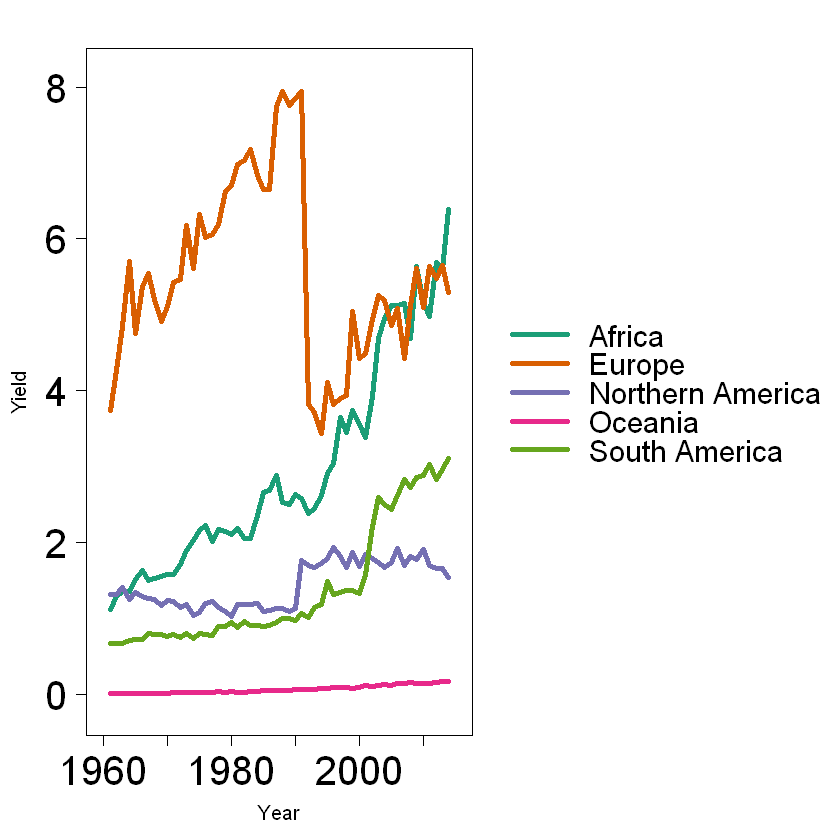

In [7]:
## Select item
item="Watermelon"
## Select colors for the lines
mypalette<-brewer.pal(5,"Dark2")
## Draw a plot with x and y axsis: X = Year, Y = Yield, based on differnt group of area
## Data source = the subset of Item.Code, without "World" and "Asia"
xyplot(Yield~Year,groups=Area, data=droplevels(subset(subset(subset(df1, Item.Code==item), Area!="World"), Area!="Asia")),
       #### Special setup of the figure
       type="l", col=mypalette, lwd=4, 
       scales=list(tck=c(1,0), x=list(cex=2), y=list(cex=2)),
       key=list(space="right",  
                lines=list(col=mypalette, lwd=4),
                text=list(c("Africa","Europe","Northern America","Oceania","South America"), cex=1.5))
       )

### 5.2 Draw a figure of watermelon, only worldwide data and Asia

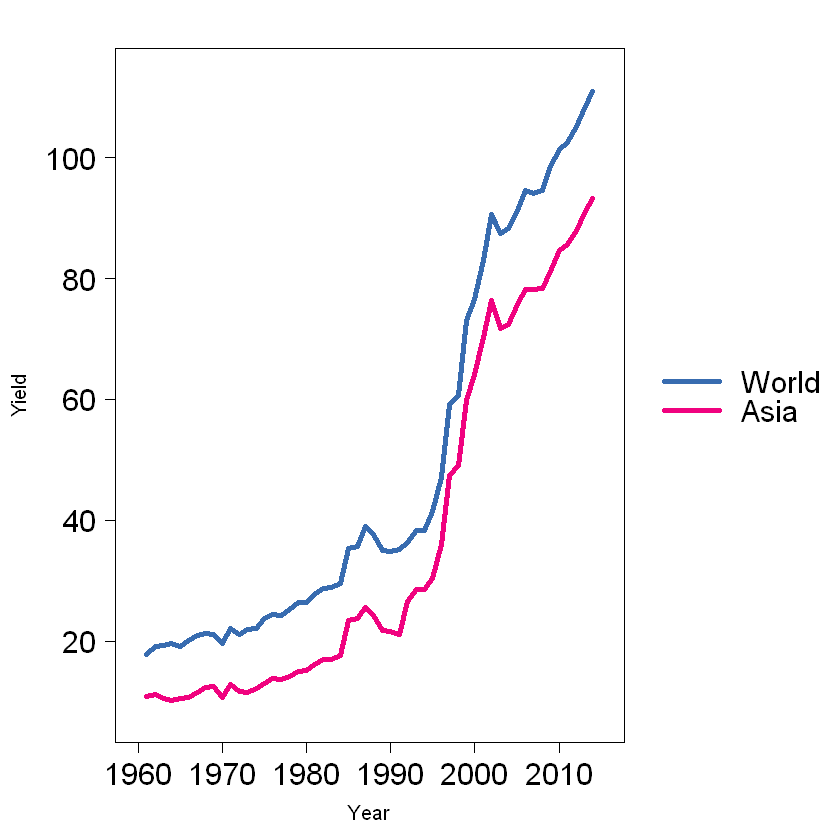

In [8]:
mypalette2<-c("#386CB0", "#F0027F")
df2 <- rbind(subset(df1, Area=="Asia"), subset(df1, Area=="World"))
xyplot(Yield~Year,groups=Area, data=subset(df2, Item.Code==item),
       type="l", col=mypalette2, lwd=4, 
       scales=list(tck=c(1,0), x=list(cex=1.5), y=list(cex=1.5)),
       key=list(space="right",   ##corner=c(0,2),
                lines=list(col=mypalette2, lwd=4),
                text=list(c("World","Asia"), cex=1.5))
)